In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('datasets//dengue.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [16]:
df.describe(include='all')

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
count,1020,1020.000000,1020,1020.000000,1020.000000
unique,12,NaN,17,NaN,NaN
top,January,NaN,Region I,NaN,NaN
freq,85,NaN,60,NaN,NaN
mean,NaN,2018.000000,NaN,1124.926471,16.513725
std,NaN,1.414907,NaN,1662.608878,96.358215
min,NaN,2016.000000,NaN,10.000000,0.000000
25%,NaN,2017.000000,NaN,247.750000,1.000000
50%,NaN,2018.000000,NaN,582.500000,3.000000
75%,NaN,2019.000000,NaN,1284.250000,7.000000


In [21]:
df.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

In [22]:
df['Month'] = df['Month'].astype('category')
df['Region'] = df['Region'].astype('category')

In [23]:
df.dtypes



Month            category
Year                int64
Region           category
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

<h1>Question 1</h1>
<h2> What is the total number of dengue cases per year?</h2>

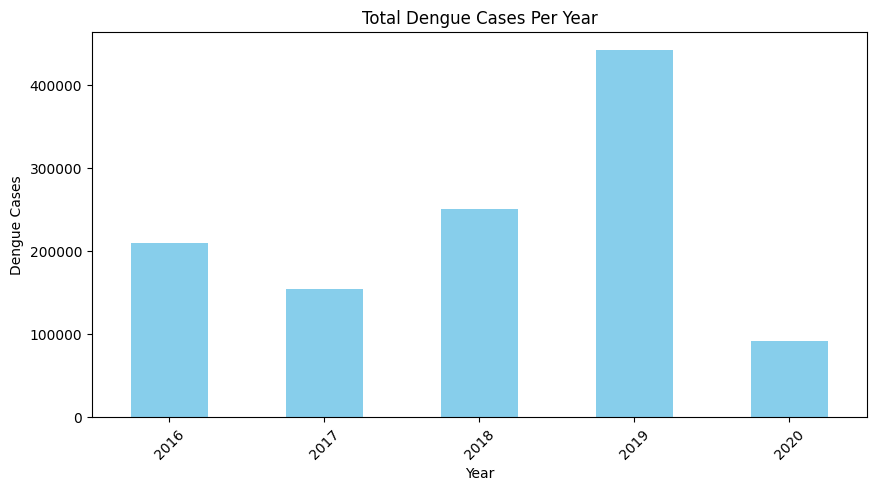

In [25]:
cases_per_year = df.groupby("Year")["Dengue_Cases"].sum()
cases_per_year.plot(kind="bar", figsize=(10,5), color='skyblue')
plt.title("Total Dengue Cases Per Year")
plt.xlabel("Year")
plt.ylabel("Dengue Cases")
plt.xticks(rotation=45)
plt.show()

<h2>Insight 1: Total Dengue Cases Per Year</h2>
<h3>The total number of dengue cases varies per year, showing trends of outbreaks and reductions. Some years have significantly higher cases than others, indicating potential epidemic periods.</h3>



<h1>Question 2</h1>
<h2>What are the top 5 regions with the highest total dengue cases?</h2>


In [28]:
top_regions = df.groupby("Region")["Dengue_Cases"].sum().nlargest(5)
print(top_regions)

Region
Region IV-A    163029
Region III     131064
Region VI      117523
NCR            115966
Region VII     110683
Name: Dengue_Cases, dtype: int64


<h2>Insight 2: </h2>
<h3>Top 1:Region IV-A <br>
Top 2:Region III<br>
Top 3:Region VI<br>
Top 4:NCR <br>
Top 5:Region VII<br>


</h3>


<h1>Question 3</h1>
<h2>What is the average number of dengue deaths per region?</h2>

In [56]:
avg_deaths_per_region = df.groupby("Region")["Dengue_Deaths"].mean()
print(avg_deaths_per_region)


Region
BARMM           5.533333
CAR            16.800000
NCR            66.800000
Region I        2.616667
Region II       3.216667
Region III      8.033333
Region IV-A    10.866667
Region IV-B     2.166667
Region IX       8.866667
Region V        3.083333
Region VI      30.416667
Region VII     29.333333
Region VIII     9.750000
Region X       14.133333
Region XI       6.416667
Region XII     46.600000
Region XIII    16.100000
Name: Dengue_Deaths, dtype: float64


<h2>Insight 3:<h2>
<h3>The Highest average number of dengue death has been recorded in NCR with 66.80 </h3>

<h1>Question 4</h1>
<h2>Which months have the highest and lowest average dengue cases?</h2>

In [30]:
avg_cases_per_month = df.groupby("Month")["Dengue_Cases"].mean().sort_values(ascending=False)
print(avg_cases_per_month)


Month
August       2206.517647
September    2093.447059
July         1626.376471
October      1384.058824
November     1116.470588
December     1040.364706
January       992.094118
February      915.305882
June          683.647059
March         677.364706
April         382.447059
May           381.023529
Name: Dengue_Cases, dtype: float64


<h2>Insight 4:</h2>
<h3>The month with the highest and lowest average dengue cases is August</h3>

<h1>Question 5</h1>
<h2>How do dengue cases trend over the years?</h2>

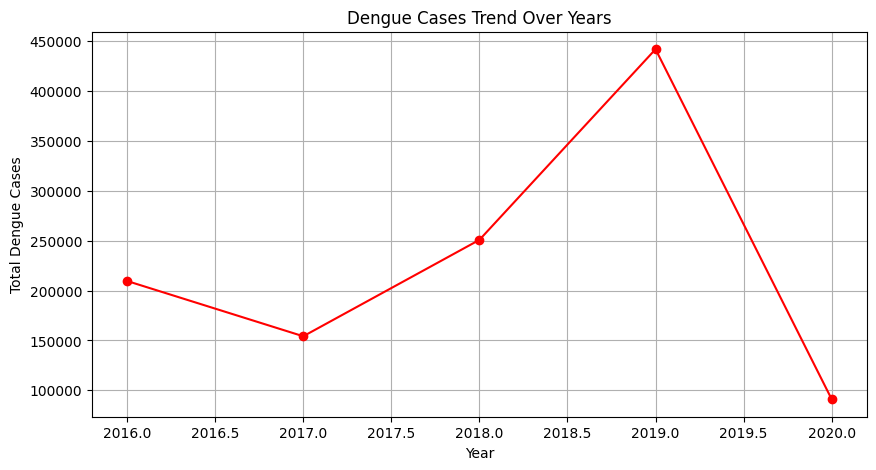

In [31]:
df.groupby("Year")["Dengue_Cases"].sum().plot(marker='o', linestyle='-', figsize=(10,5), color='red')
plt.title("Dengue Cases Trend Over Years")
plt.xlabel("Year")
plt.ylabel("Total Dengue Cases")
plt.grid()
plt.show()


<h2>Insight 5</h2>
<h3>The graph shows a peak of cases in the year 2019, an epidemic likely happened that year</h3>

<h1>Question 6</h1>
<h2>What is the correlation between dengue cases and dengue deaths?</h2>

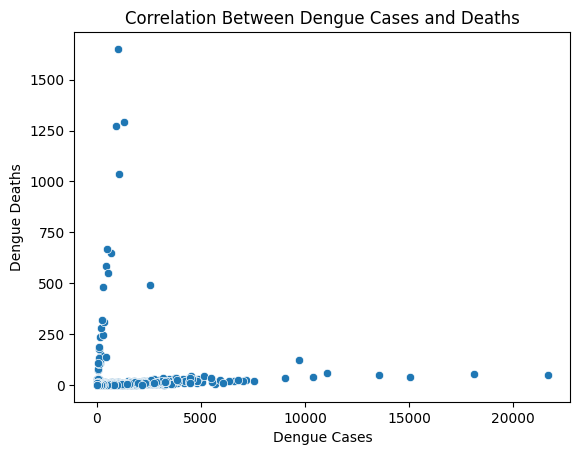

               Dengue_Cases  Dengue_Deaths
Dengue_Cases       1.000000       0.038322
Dengue_Deaths      0.038322       1.000000


In [32]:
sns.scatterplot(x=df["Dengue_Cases"], y=df["Dengue_Deaths"])
plt.title("Correlation Between Dengue Cases and Deaths")
plt.xlabel("Dengue Cases")
plt.ylabel("Dengue Deaths")
plt.show()

print(df[["Dengue_Cases", "Dengue_Deaths"]].corr())


<h2>Insight 6</h2>
<h3>
    While there is a positive correlation between dengue cases and deaths, it is not perfectly linear. This suggests that mortality rates depend on factors beyond case numbers, such as healthcare quality and early detection.
</h3>

<h1>Question 7</h1>
<h2> What is the total number of dengue cases and deaths per year and region?</h2>

In [34]:
cases_deaths_per_year_region = df.groupby(["Year", "Region"])[["Dengue_Cases", "Dengue_Deaths"]].sum().unstack()
print(cases_deaths_per_year_region)


       Dengue_Cases                                                         \
Region        BARMM   CAR    NCR Region I Region II Region III Region IV-A   
Year                                                                         
2016           2191  9164  13002     8281      3891      20989       24282   
2017            485  4045  26103     8236      5310      25200       22421   
2018           2460  7584  29200    15511     17678      31726       30410   
2019           5393  8808  40478    19867     16634      37158       76195   
2020           1008   981   7183     7171      1628      15991        9721   

                                       ... Dengue_Deaths                     \
Region Region IV-B Region IX Region V  ...   Region IV-B Region IX Region V   
Year                                   ...                                    
2016          3999      7215     2532  ...            18        41       16   
2017          2770      4274     3225  ...            12   

<h2>Insight 7: Dengue Cases and Deaths Per Year and Region</h2>
<h3>Some regions have a consistently high fatality rate relative to case numbers. This may indicate a lack of access to timely treatment, presence of a more severe virus strain, or poor living conditions.</h3>


<h1>Question 8</h1>
<h2>How does the number of dengue cases vary by month?</h2>

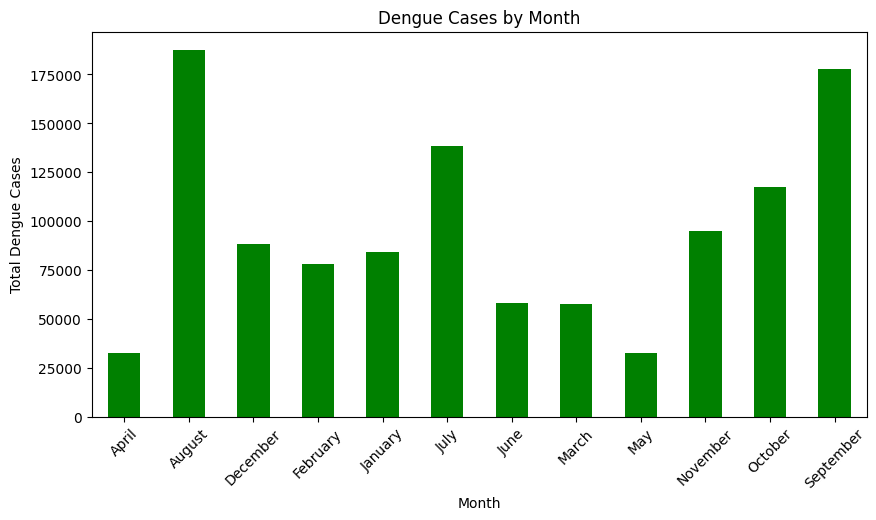

In [35]:
cases_per_month = df.groupby("Month")["Dengue_Cases"].sum()
cases_per_month.plot(kind="bar", color='green', figsize=(10,5))
plt.title("Dengue Cases by Month")
plt.xlabel("Month")
plt.ylabel("Total Dengue Cases")
plt.xticks(rotation=45)
plt.show()


<h2>Insight 8: Dengue Cases by Month</h2>
<h3>The highest number of dengue cases is often recorded in September and August, corresponding to the wet season. These trends can help in predicting future outbreaks and planning interventions.</h3>


<h1>Question 9</h1>
<h2>What is the yearly average number of dengue deaths?</h2>

In [36]:
avg_deaths_per_year = df.groupby("Year")["Dengue_Deaths"].mean()
print(avg_deaths_per_year)


Year
2016    39.838235
2017    22.367647
2018     6.009804
2019     8.495098
2020     5.857843
Name: Dengue_Deaths, dtype: float64


<h2>Insight 9: Yearly Average Dengue Deaths</h2>
<h3>The years 2016 and 2017 have significantly higher average deaths than others, likely reflecting changes in virus virulence, healthcare response, or environmental factors that influence outbreaks.</h3>


<h1>Question 10</h1>
<h2>Which region had the highest dengue cases in a single month?</h2>

In [37]:
max_cases = df.loc[df["Dengue_Cases"].idxmax()]
print(max_cases)


Month              September
Year                    2019
Region           Region IV-A
Dengue_Cases           21658
Dengue_Deaths             48
Name: 224, dtype: object



<h2>Insight 10: Region with Highest Dengue Cases in a Single Month</h2>
<h3>Region IV-A experienced an extreme outbreak in a single month, suggesting either an uncontrolled spread or delayed reporting of accumulated cases.</h3>


<h1>Question 11</h1>
<h2>What is the median number of dengue cases per region?</h2>

In [41]:
median_cases_per_region = df.groupby("Region")["Dengue_Cases"].median()
print(median_cases_per_region)


Region
BARMM           136.0
CAR             298.0
NCR            1276.0
Region I        702.0
Region II       413.0
Region III     1834.5
Region IV-A    2096.0
Region IV-B     376.0
Region IX       494.0
Region V        245.0
Region VI       783.0
Region VII     1227.0
Region VIII     426.5
Region X        969.5
Region XI       457.0
Region XII      824.5
Region XIII     410.0
Name: Dengue_Cases, dtype: float64


<h2>Insight 11: Median Dengue Cases Per Region</h2>
<h3>Using the median instead of the mean, we see that some regions have more stable case numbers, while others experience frequent extreme fluctuations.</h3>


<h1>Question 12</h1>
<h2>Which year had the highest average dengue deaths per month?</h2>

In [42]:
highest_avg_deaths_year = df.groupby("Year")["Dengue_Deaths"].mean().idxmax()
print(f"Year with highest average dengue deaths per month: {highest_avg_deaths_year}")


Year with highest average dengue deaths per month: 2016


<h2>Insight 12: Year with Highest Average Dengue Deaths Per Month</h2>
<h3>The year 2016 recorded the highest monthly average of dengue deaths, potentially due to an aggressive strain, healthcare system overload, or lack of awareness during that period.</h3>


<h1>Question 13</h1>
<h2>How do dengue cases vary per region over the years?</h2>

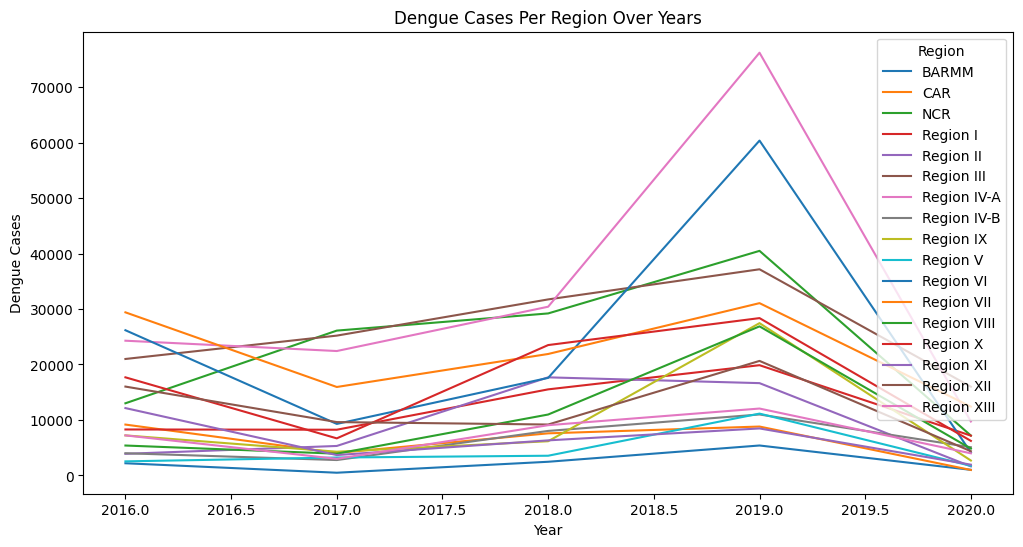

In [43]:
df.pivot_table(index="Year", columns="Region", values="Dengue_Cases", aggfunc="sum").plot(figsize=(12,6))
plt.title("Dengue Cases Per Region Over Years")
plt.ylabel("Dengue Cases")
plt.legend(title="Region")
plt.show()


<h2>Insight 13: Dengue Cases Per Region Over Years</h2>
<h3>Some regions like IV-A consistently have high dengue cases over multiple years, indicating that interventions in those areas may not be sufficient or that dengue remains endemic.</h3>


<h1>Question 14</h1>
<h2>What is the percentage contribution of each region to the total dengue cases?</h2>

In [44]:
region_percentage = df.groupby("Region")["Dengue_Cases"].sum() / df["Dengue_Cases"].sum() * 100
print(region_percentage)


Region
BARMM           1.005469
CAR             2.665272
NCR            10.106630
Region I        5.147700
Region II       3.934113
Region III     11.422446
Region IV-A    14.208249
Region IV-B     2.688542
Region IX       4.164194
Region V        1.931891
Region VI      10.242325
Region VII      9.646208
Region VIII     4.530405
Region X        7.184522
Region XI       2.834346
Region XII      5.211844
Region XIII     3.075844
Name: Dengue_Cases, dtype: float64


<h2>Insight 14: Percentage Contribution of Each Region to Total Dengue Cases</h2>
<h3>A few regions contribute disproportionately to total dengue cases, highlighting the need for targeted disease control measures in those areas.</h3>


<h1>Question 15</h1>
<h2>How do dengue cases compare between the first and second half of the year?

</h2>

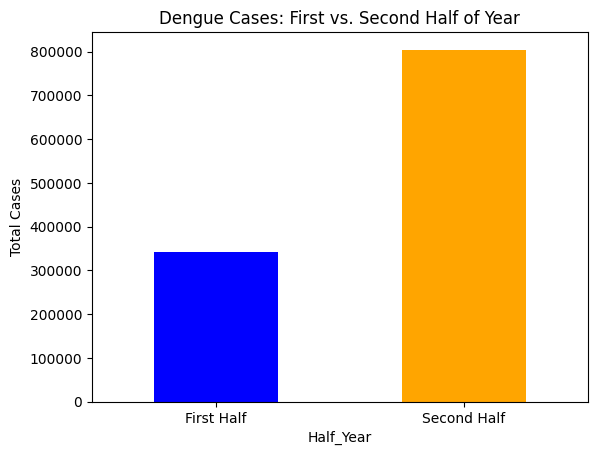

In [45]:
df["Half_Year"] = df["Month"].apply(lambda x: "First Half" if x in ["January", "February", "March", "April", "May", "June"] else "Second Half")
cases_half_year = df.groupby("Half_Year")["Dengue_Cases"].sum()
cases_half_year.plot(kind="barb", color=['blue', 'orange'])
plt.title("Dengue Cases: First vs. Second Half of Year")
plt.ylabel("Total Cases")
plt.xticks(rotation=0)
plt.show()


<h2>Insight 15: Dengue Cases in First Half vs. Second Half of Year</h2>
<h3>There is a noticeable difference in dengue cases between the first and second half of the year, typically aligning with seasonal changes affecting mosquito populations.</h3>


<h1>Question 16</h1>
<h2>What is the maximum number of dengue deaths recorded in a month?</h2>

In [46]:
max_deaths = df["Dengue_Deaths"].max()
print(f"Maximum dengue deaths recorded in a single month: {max_deaths}")


Maximum dengue deaths recorded in a single month: 1651


<h2>Insight 16: Maximum Dengue Deaths Recorded in a Single Month</h2>
<h3>A specific month saw the highest number of dengue-related deaths, likely due to a peak in outbreaks or overwhelmed healthcare facilities.</h3>


<h1>Question 17</h1>
<h2>What is the standard deviation of dengue cases per region?</h2>

In [47]:
std_cases_per_region = df.groupby("Region")["Dengue_Cases"].std()
print(std_cases_per_region)


Region
BARMM           190.276613
CAR             554.077376
NCR            1936.956886
Region I       1005.175512
Region II       866.767789
Region III     1761.876765
Region IV-A    3485.744342
Region IV-B     474.029028
Region IX      1125.546539
Region V        481.353791
Region VI      3135.241504
Region VII     1451.211897
Region VIII    1305.976122
Region X       1149.844815
Region XI       448.433355
Region XII      762.115261
Region XIII     508.460991
Name: Dengue_Cases, dtype: float64


<h2>Insight 17: Standard Deviation of Dengue Cases Per Region</h2>
<h3>Some regions like IV-A and VI have a high standard deviation, meaning dengue cases fluctuate greatly. Others have a more stable pattern, suggesting consistent environmental conditions for mosquito breeding.</h3>


<h1>Question 18</h1>
<h2> Are there any outliers in dengue cases using boxplot?</h2>

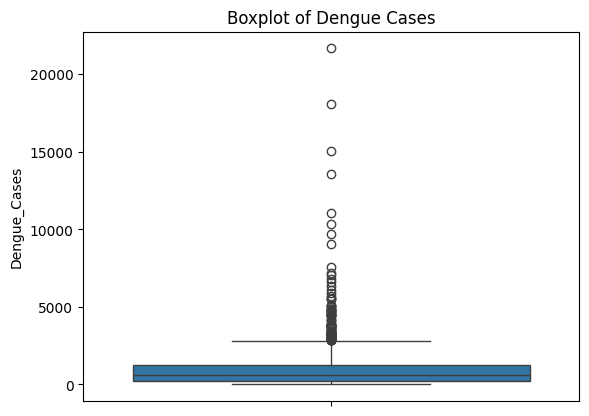

In [48]:
sns.boxplot(y=df["Dengue_Cases"])
plt.title("Boxplot of Dengue Cases")
plt.show()


<h2>Insight 18: Outliers in Dengue Cases</h2>
<h3>Boxplot analysis reveals outliers where dengue cases spiked unexpectedly. These events could be linked to localized outbreaks, inaccurate reporting, or sudden environmental changes.</h3>


<h1>Question 19</h1>
<h2>What is the cumulative sum of dengue cases over the years?</h2>

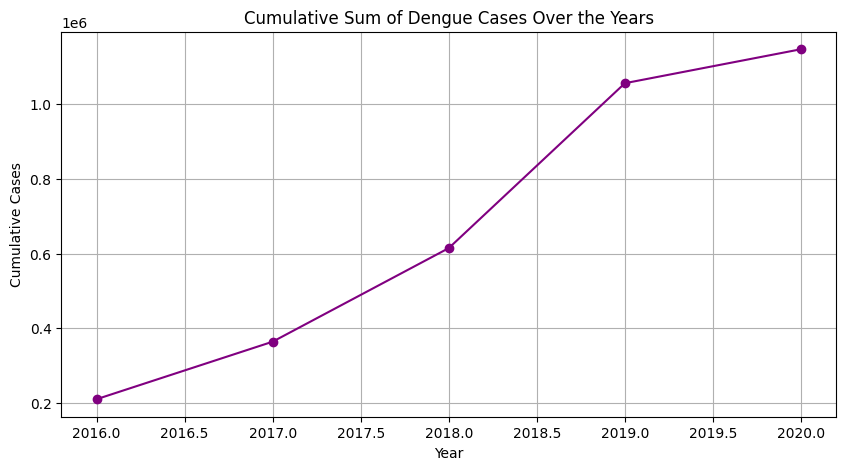

In [49]:
cumulative_cases = df.groupby("Year")["Dengue_Cases"].sum().cumsum()
cumulative_cases.plot(marker='o', linestyle='-', color='purple', figsize=(10,5))
plt.title("Cumulative Sum of Dengue Cases Over the Years")
plt.xlabel("Year")
plt.ylabel("Cumulative Cases")
plt.grid()
plt.show()


<h2>Insight 19: Cumulative Dengue Cases Over the Years</h2>
<h3>The cumulative sum of dengue cases indicates a growing burden of the disease over time, emphasizing the importance of sustained prevention and control efforts.</h3>


<h1>Question 20</h1>
<h2>What is the highest and lowest yearly dengue case count?</h2>

In [50]:
max_cases_year = df.groupby("Year")["Dengue_Cases"].sum().idxmax()
min_cases_year = df.groupby("Year")["Dengue_Cases"].sum().idxmin()

print(f"Year with highest dengue cases: {max_cases_year}")
print(f"Year with lowest dengue cases: {min_cases_year}")


Year with highest dengue cases: 2019
Year with lowest dengue cases: 2020



<h2>Insight 20: Year with Highest and Lowest Dengue Cases</h2>
<h3>The year 2019 with the highest dengue cases likely experienced an outbreak or inadequate vector control. The year 2020 with the lowest cases may indicate effective interventions or natural reductions in mosquito populations.</h3>